In [244]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [245]:
from pathlib import Path
TASKDIR = Path("../tasks")
TASKDIR.mkdir(exist_ok=True)
import os, sys
import networkx as nx
if not "../src" in sys.path:
    sys.path.append("../src")
# Local modules:
import tokens
import utils

In [246]:
cmd = tokens.BooleanToken(True)
print(str(cmd))
cmd().show()

T


True

In [247]:
cmd = tokens.IntegerToken(1)
print(str(cmd))
cmd().show()

I"


1

In [248]:
cmd = tokens.StringToken("simple test")
print(str(cmd))
cmd().show()

S3)-0,%}4%34


'simple test'

In [249]:
cmd = tokens.UnaryToken("-", tokens.IntegerToken(3))
print(str(cmd))
result = cmd()
print(result)
result.value

U- I$
U- I$


-3

In [250]:
tokens.to_base94(-1)

got negative number


'"'

### Checks with simple types

In [251]:
token = tokens.BooleanToken(1)
str(token), repr(token), token.show()

('T', 'T', True)

In [252]:
token = tokens.IntegerToken(1)
str(token), repr(token), token.show()

('I"', 'I(1)', 1)

In [253]:
token = tokens.StringToken("11ff")
str(token), repr(token), token.show()

('SVV&&', 'S(11ff)', '11ff')

### Checks with Lambda and Variable types

In [254]:
token = tokens.VariableToken(2)
str(token), repr(token), token.show()

('v#', 'v2', 'v2')

In [255]:
token = tokens.LambdaToken(3, 3)
str(token), repr(token), token.show()

('L$ I$', 'L3->I(3)', {'L3': 3})

In [256]:
token = tokens.LambdaToken(3, tokens.VariableToken(3))
str(token), repr(token), token.show()

('L$ v$', 'L3->v3', {'L3': 'v3'})

### Checks with UnaryToken

In [257]:
token = tokens.UnaryToken("!", tokens.IntegerToken(1))
str(token), repr(token), token.show(), token.value

('U! I"', 'U!(I(1))', ['U!', 1], False)

In [258]:
token = tokens.UnaryToken("-", tokens.IntegerToken(1))
str(token), repr(token), token.show()

('U- I"', 'U-(I(1))', ['U-', 1])

In [259]:
DOUBLE_NEGATIVE_NUMBER = tokens.UnaryToken("-", - tokens.IntegerToken(1))
token = DOUBLE_NEGATIVE_NUMBER()
print(str(token), repr(token), token.show())
token = - DOUBLE_NEGATIVE_NUMBER
print(str(token), repr(token), token.show())
# tokens.IntegerToken(1).value

I" I(1) 1
U- I" U-(I(1)) ['U-', 1]


### Check simple operations with BinaryToken

In [260]:
TRUE = tokens.BooleanToken(True)
FALSE = tokens.BooleanToken(False)

In [261]:
print("Check = operation")
ops_to_check = [ 
    ["=", [tokens.IntegerToken(1), tokens.IntegerToken(1)], TRUE],
    ["=", [tokens.IntegerToken(1), tokens.IntegerToken(3)], FALSE],
    ["=", [tokens.StringToken("a"), tokens.StringToken("a")], TRUE],
    ["=", [tokens.StringToken("a"), tokens.StringToken("b")], FALSE],
    ["=", [tokens.BooleanToken(1), tokens.BooleanToken("a")], TRUE],
    ["=", [tokens.BooleanToken(0), tokens.BooleanToken("a")], FALSE],
]
for test_number, (name, operands, expected_value) in enumerate(ops_to_check):
    print(f"Test #{test_number}:", f"{name}, {operands}, {expected_value}")
    cmd = tokens.BinaryToken(name, operands)
    result = cmd()

    print("   ", repr(str(cmd)), "--->", repr(result), result.show())
    if expected_value is not None:
        # check
        assert (result == expected_value).value, f"Expected result in test #{test_number} differs from actual result"
        pass


Check = operation
Test #0: =, [I(1), I(1)], T
    'B= I" I"' ---> T True
Test #1: =, [I(1), I(3)], F
    'B= I" I$' ---> F False
Test #2: =, [S(a), S(a)], T
    'B= S! S!' ---> T True
Test #3: =, [S(a), S(b)], F
    'B= S! S"' ---> F False
Test #4: =, [T, T], T
    'B= T T' ---> T True
Test #5: =, [F, T], F
    'B= F T' ---> F False


In [262]:
print("Check integer operations")

ops_to_check = [
    ["+", [tokens.IntegerToken(1), tokens.IntegerToken(3)], tokens.IntegerToken(4)],
    ["-", [tokens.IntegerToken(1), tokens.IntegerToken(3)], tokens.wrap_with_token(-2)],
    ["*", [tokens.IntegerToken(1), tokens.IntegerToken(3)], tokens.IntegerToken(3)],
    ["/", [tokens.IntegerToken(1), tokens.IntegerToken(3)], tokens.IntegerToken(0)],
    ["%", [tokens.IntegerToken(1), tokens.IntegerToken(3)], tokens.IntegerToken(1)],
    ["<", [tokens.IntegerToken(1), tokens.IntegerToken(3)], TRUE],
    [">", [tokens.IntegerToken(1), tokens.IntegerToken(3)], FALSE],

]


for test_number, (name, operands, expected_value) in enumerate(ops_to_check):
    print(f"Test #{test_number}:", f"{name}, {operands}, {expected_value}")
    cmd = tokens.BinaryToken(name, operands)
    result = cmd()

    print("   ", repr(str(cmd)), "--->", repr(result), result.show())
    if expected_value is not None:
        # check
        assert (result == expected_value).value, f"Expected result in test #{test_number} differs from actual result"
        pass


Check integer operations
Test #0: +, [I(1), I(3)], I%
    'B+ I" I$' ---> I(4) 4
Test #1: -, [I(1), I(3)], U- I#
    'B- I" I$' ---> U-(I(2)) ['U-', 2]
Test #2: *, [I(1), I(3)], I$
    'B* I" I$' ---> I(3) 3
Test #3: /, [I(1), I(3)], I!
b I$
    'B/ I" I$' ---> I(0) 0
Test #4: %, [I(1), I(3)], I"
    'B% I" I$' ---> I(1) 1
Test #5: <, [I(1), I(3)], T
    'B< I" I$' ---> T True
Test #6: >, [I(1), I(3)], F
    'B> I" I$' ---> F False


In [263]:
tokens.BinaryToken("|", [TRUE, TRUE])()


# cmd()

T

In [264]:
print("Check bool operations")

ops_to_check = [

    ["|", [tokens.BooleanToken(1), tokens.BooleanToken("a")], TRUE],
    ["|", [TRUE, FALSE], TRUE],
    ["|", [FALSE, TRUE], TRUE],
    ["|", [FALSE, FALSE], FALSE],
    ["&", [tokens.BooleanToken(1), tokens.BooleanToken("a")], TRUE],
    ["&", [TRUE, FALSE], FALSE],
    ["&", [FALSE, TRUE], FALSE],
    ["&", [FALSE, FALSE], FALSE],
]


for test_number, (name, operands, expected_value) in enumerate(ops_to_check):
    print(f"Test #{test_number}:", f"{name}, {operands}, {expected_value}")
    cmd = tokens.BinaryToken(name, operands)
    result = cmd()
    if not isinstance(result, tokens.CommonToken):
        print(result)
    s = "     " + repr(str(cmd)) + " ---> "
    s += repr(result)
    s += f" {result.show()}"

    if expected_value is not None:
        # check
        assert (result == expected_value).value, f"Expected result in test #{test_number} differs from actual result"
        pass


Check bool operations
Test #0: |, [T, T], T
Test #1: |, [T, F], T
Test #2: |, [F, T], T
Test #3: |, [F, F], F
Test #4: &, [T, T], T
Test #5: &, [T, F], F
Test #6: &, [F, T], F
Test #7: &, [F, F], F


In [265]:
print("Check string operations")
DOUBLE_NEGATIVE_NUMBER = tokens.UnaryToken("-", - tokens.IntegerToken(1))

ops_to_check = [
    
    [".", [tokens.StringToken("a"), tokens.StringToken("bcde")], tokens.StringToken("abcde")],
    ["T", [tokens.IntegerToken(1), tokens.StringToken("abcde")], tokens.StringToken("a")],
    ["T", [DOUBLE_NEGATIVE_NUMBER, tokens.StringToken("abcde")], tokens.StringToken("a")],
    ["D", [tokens.IntegerToken(1), tokens.StringToken("abcde")], tokens.StringToken("bcde")],
    ["D", [DOUBLE_NEGATIVE_NUMBER, tokens.StringToken("abcde")], tokens.StringToken("bcde")],
]


for test_number, (name, operands, expected_value) in enumerate(ops_to_check):
    print(f"Test #{test_number}:")
    print(f"    name: {repr(name)}")
    print(f"    operands: {operands}")
    print(f"    expected_value: {repr(expected_value)}")
    cmd = tokens.BinaryToken(name, operands)
    result = cmd()

    print("   ", repr(str(cmd)), "--->", repr(result), result.show())
    if expected_value is not None:
        # check
        assert (result == expected_value).value, f"Expected result in test #{test_number} differs from actual result"
        pass


Check string operations
Test #0:
    name: '.'
    operands: [S(a), S(bcde)]
    expected_value: S(abcde)
    'B. S! S"#$%' ---> S(abcde) abcde
Test #1:
    name: 'T'
    operands: [I(1), S(abcde)]
    expected_value: S(a)
    'BT I" S!"#$%' ---> S(a) a
Test #2:
    name: 'T'
    operands: [U-(U-(I(1))), S(abcde)]
    expected_value: S(a)
    'BT U- U- I" S!"#$%' ---> S(a) a
Test #3:
    name: 'D'
    operands: [I(1), S(abcde)]
    expected_value: S(bcde)
    'BD I" S!"#$%' ---> S(bcde) bcde
Test #4:
    name: 'D'
    operands: [U-(U-(I(1))), S(abcde)]
    expected_value: S(bcde)
    'BD U- U- I" S!"#$%' ---> S(bcde) bcde


In [266]:

# Example command which evaluates the expression to string capable to communicating with server
cmd = tokens.BinaryToken(".", [
    tokens.StringToken("echo "), 
    tokens.UnaryToken("$",
        tokens.BinaryToken("+", [tokens.IntegerToken(1), tokens.IntegerToken(2)])
    )
])
cmd = tokens.BinaryToken("+", [tokens.IntegerToken(1), tokens.IntegerToken(2)])

print(str(cmd))
cmd().show()




B+ I" I#


3

### Binary token $

In [267]:
# TEST_STRING + TEST_STRING


In [269]:
print("Check $ operations")
# DOUBLE_NEGATIVE_NUMBER = tokens.UnaryToken("-", - tokens.IntegerToken(1))
TEST_STRING = tokens.StringToken("bcde")
LAMBDA_ID = lambda num: tokens.LambdaToken(num, tokens.VariableToken(num))
LAMBDA_NID = lambda num, num2: tokens.LambdaToken(num, tokens.VariableToken(num2))
LAMBDA_CONST = lambda num, value: tokens.LambdaToken(num, value)
LAMBDA_DOT = lambda num: tokens.LambdaToken(num, tokens.BinaryToken(".", [tokens.VariableToken(num), tokens.VariableToken(num)]))
                                                     
ops_to_check = [
    ["$", [LAMBDA_ID(0), TEST_STRING], TEST_STRING],
    ["$", [LAMBDA_ID(1), TEST_STRING], TEST_STRING],
    ["$", [LAMBDA_CONST(0, "bcde"), TEST_STRING], TEST_STRING],
    ["$", [LAMBDA_CONST(3, "bcde"), TEST_STRING], TEST_STRING],
    
    ["$", [LAMBDA_CONST(3, 3), TEST_STRING], tokens.IntegerToken(3)],
    ["$", [LAMBDA_CONST(3, 4), TEST_STRING], tokens.IntegerToken(4)],
    ["$", [LAMBDA_CONST(3, TEST_STRING), TEST_STRING], TEST_STRING],
    ["$", [LAMBDA_CONST(3, TEST_STRING), TEST_STRING], TEST_STRING],
    
    ["$", [LAMBDA_DOT(3), TEST_STRING], TEST_STRING + TEST_STRING],
    
    # ["$", [LAMBDA_CONST(3, ), TEST_STRING], TEST_STRING],
    #["$", [tokens.IntegerToken(1), tokens.StringToken("abcde")], tokens.StringToken("a")],
    #["$", [DOUBLE_NEGATIVE_NUMBER, tokens.StringToken("abcde")], tokens.StringToken("a")],
    #["$", [tokens.IntegerToken(1), tokens.StringToken("abcde")], tokens.StringToken("bcde")],
    #["$", [DOUBLE_NEGATIVE_NUMBER, tokens.StringToken("abcde")], tokens.StringToken("bcde")],
]


for test_number, (name, operands, expected_value) in enumerate(ops_to_check):
    print(f"Test #{test_number}:")
    #print(f"    name: {repr(name)}")
    #print(f"    operands: {operands}")
    #print(f"    expected_value: {repr(expected_value)}")
    cmd = tokens.BinaryToken(name, operands)
    result = cmd()

    print("   ", repr(str(cmd)), "--->", repr(result), result.show())
    if expected_value is not None:
        # check
        assert (result == expected_value).value, f"Expected result in test #{test_number} differs from actual result"
        pass


Check $ operations
Test #0:
after simplify is called [L0->v0, S(bcde)]
comparing expression inficator with current one
v0 0
    'B$ L! S"#$% S"#$%' ---> S(bcde) bcde
Test #1:
after simplify is called [L1->v1, S(bcde)]
comparing expression inficator with current one
v1 1
    'B$ L" S"#$% S"#$%' ---> S(bcde) bcde
Test #2:
after simplify is called [L0->S(bcde), S(bcde)]
call substitute 0 S(bcde) S(bcde)
    'B$ L! S"#$% S"#$%' ---> S(bcde) bcde
Test #3:
after simplify is called [L3->S(bcde), S(bcde)]
call substitute 3 S(bcde) S(bcde)
    'B$ L$ S"#$% S"#$%' ---> S(bcde) bcde
Test #4:
after simplify is called [L3->I(3), S(bcde)]
call substitute 3 I(3) S(bcde)
    'B$ L$ I$ S"#$%' ---> I(3) 3
Test #5:
after simplify is called [L3->I(4), S(bcde)]
call substitute 3 I(4) S(bcde)
    'B$ L$ I% S"#$%' ---> I(4) 4
Test #6:
after simplify is called [L3->S(bcde), S(bcde)]
call substitute 3 S(bcde) S(bcde)
    'B$ L$ S"#$% S"#$%' ---> S(bcde) bcde
Test #7:
after simplify is called [L3->S(bcde), S(bc

# Goal 
Currently the logic behind lambdas doesn't work correctly. To fix it I'll need to debug it.

In [270]:
token_expression = utils.parse_text("B$ L# v# SB%,,/")
expression_graph = token_expression.graph()

In [271]:
# utils.parse_text("B$ B$ L# L$ v# B. SB%,,/ S}Q/2,$_ IK").graph_data()
print(str(token_expression))
token_expression().value

B$ L# v# SB%,,/
after simplify is called [L2->v2, S(Hello)]
comparing expression inficator with current one
v2 2


'Hello'

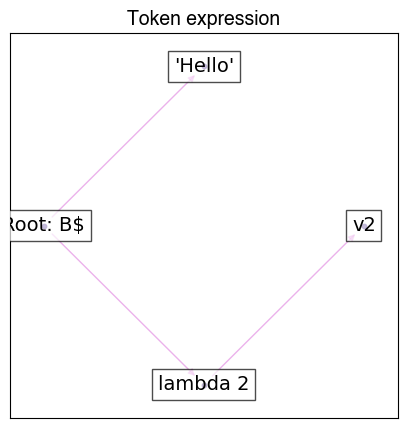

In [272]:
# nx.draw(expression_graph, pos=nx.spring_layout(expression_graph))
import matplotlib.pyplot as plt

pos = nx.bfs_layout(expression_graph, start=list(expression_graph.nodes)[0])
fig, ax = plt.subplots(figsize=(5, 5))
# Visualize graph components
nx.draw_networkx_edges(expression_graph, pos, alpha=0.3, width=1, edge_color="m")
nx.draw_networkx_nodes(expression_graph, pos, node_size=10, node_color="#210070", alpha=0.9)
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(
    expression_graph, pos, font_size=14, bbox=label_options, 
    labels=dict(expression_graph.nodes.data("label"))
)

# Title/legend
font = {"fontname": "Helvetica", "color": "k", "fontweight": "bold", "fontsize": 14}
ax.set_title("Token expression", font)
# Change font color for legend
font["color"] = "r"

In [273]:
token_expression = utils.parse_text("B$ L# B$ L\" B+ v\" v\" B* I$ I# v8")
expression_graph = token_expression.graph()

In [274]:
repr(token_expression)

'B$([L2->B$([L1->B+([v1, v1]), B*([I(3), I(2)])]), v23])'

In [275]:
print(str(token_expression))
result = token_expression()
result.value, str(result)

B$ L# B$ L" B+ v" v" B* I$ I# v8
v"
I$
after simplify is called [L1->B+([v1, v1]), I(6)]
call substitute 1 B+([v1, v1]) I(6)
I'
after simplify is called [L2->I(12), v23]
call substitute 2 I(12) v23


(12, 'I-')

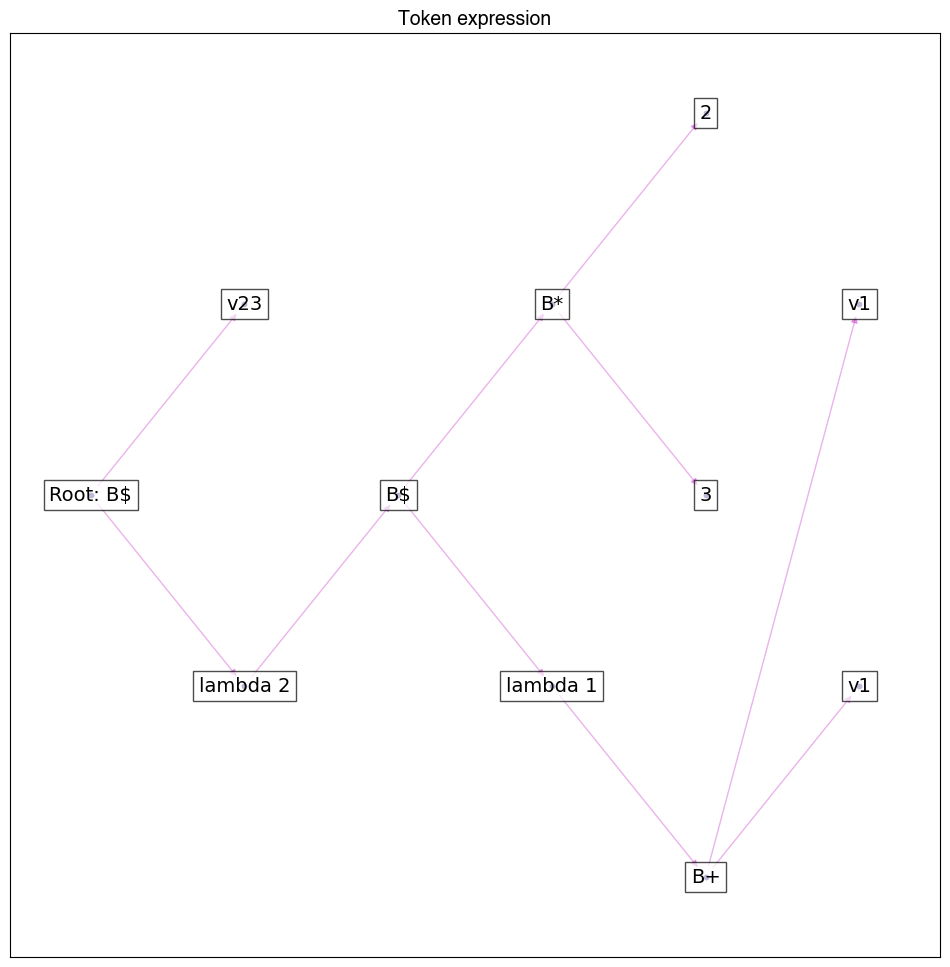

In [276]:

pos = nx.bfs_layout(expression_graph, start=list(expression_graph.nodes)[0])
fig, ax = plt.subplots(figsize=(12, 12))
# Visualize graph components
nx.draw_networkx_edges(expression_graph, pos, alpha=0.3, width=1, edge_color="m")
nx.draw_networkx_nodes(expression_graph, pos, node_size=10, node_color="#210070", alpha=0.9)
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(
    expression_graph, pos, font_size=14, bbox=label_options, 
    labels=dict(expression_graph.nodes.data("label"))
)

# Title/legend
font = {"fontname": "Helvetica", "color": "k", "fontweight": "bold", "fontsize": 14}
ax.set_title("Token expression", font)
# Change font color for legend
font["color"] = "r"

In [277]:
test_string="B$ B$ L# L$ v# B. SB%,,/ S}Q/2,$_ IK"
token_expression = utils.parse_text(test_string)
result = token_expression()
result()

SB%,,/
after simplify is called [L2->L3->v2, S(Hello World!)]
call substitute 2 L3->v2 S(Hello World!)
after simplify is called [L3->S(Hello World!), I(42)]
call substitute 3 S(Hello World!) I(42)


S(Hello World!)

In [278]:
# print(token_expression.parameters[0].show())
# token_expression.simplify()
# token_expression.parameters[0].simplify()
# token_expression()
# token_expression.simplify()
# result.substitution_list

In [300]:
test_string = "B$ B$ L\" B$ L# B$ v\" B$ v# v# L# B$ v\" B$ v# v# L\" L# ? B= v# I! I\" B$ L$ B+ B$ v\" v$ B$ v\" v$ B- v# I\" I%"
token_expression = utils.parse_text(test_string)
#result = token_expression()
#result.show()

In [303]:
# token_expression.parameters[0].parameters #.parameters

In [305]:
# repr(token_expression.parameters[0])  #.parameters[1].expression.expression.f_value.parameters

In [306]:
# repr(token_expression.parameters[1]) 

In [307]:
# repr(token_expression.parameters[0].apply(token_expression.parameters[1]))